In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from transformers import pipeline

/Users/faustogerman/miniforge3/envs/PekinSearch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Sentiment Analysis

### Load the Sentiment Analysis Pre-Trained Model for Positive, Negative, Neutral

In [2]:
sentiment_pipeline = pipeline("text-classification", model='cardiffnlp/twitter-roberta-base-sentiment-latest')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Load the Dataset

In [3]:
RAW_DATA = pd.read_csv("./test_data.csv")

### Analyze the Tweets

In [4]:
tweets = list(RAW_DATA["text"])
tweets_sentiment = sentiment_pipeline(tweets)

tweets_sentiment

[{'label': 'Neutral', 'score': 0.750514030456543},
 {'label': 'Neutral', 'score': 0.5214418172836304},
 {'label': 'Positive', 'score': 0.879340648651123},
 {'label': 'Neutral', 'score': 0.6937584280967712},
 {'label': 'Neutral', 'score': 0.8271093368530273},
 {'label': 'Neutral', 'score': 0.8336398601531982},
 {'label': 'Neutral', 'score': 0.7758318781852722},
 {'label': 'Neutral', 'score': 0.8317252397537231},
 {'label': 'Neutral', 'score': 0.7384429574012756},
 {'label': 'Positive', 'score': 0.8375328779220581},
 {'label': 'Positive', 'score': 0.5260558724403381},
 {'label': 'Positive', 'score': 0.7527967691421509},
 {'label': 'Positive', 'score': 0.5080240964889526},
 {'label': 'Positive', 'score': 0.7975014448165894},
 {'label': 'Negative', 'score': 0.49743515253067017},
 {'label': 'Neutral', 'score': 0.593002200126648},
 {'label': 'Positive', 'score': 0.9251665472984314},
 {'label': 'Neutral', 'score': 0.5851380228996277},
 {'label': 'Neutral', 'score': 0.7866891622543335},
 {'lab

### Plot a Histogram of the Sentiment Analysis Result

In [5]:
sentiment_histograms = {
    "positive": 0,
    "negative": 0,
    "neutral": 0
}

for sentiment in tweets_sentiment:
    sentiment_histograms[sentiment['label'].lower()] += 1

sentiment_histograms

{'positive': 34, 'negative': 4, 'neutral': 62}

<BarContainer object of 3 artists>

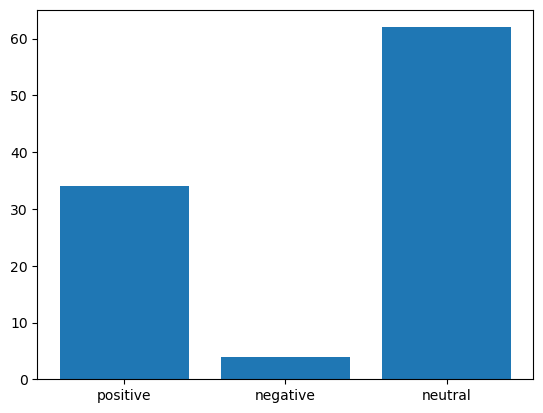

In [6]:
plt.bar(sentiment_histograms.keys(), sentiment_histograms.values())

### Append the Sentiment Analysis Results to teh Dataset

In [7]:
sentiment_labels = [s['label'] for s in tweets_sentiment]
sentiment_scores = [s['score'] for s in tweets_sentiment]

RAW_DATA["sentiment_label"] = sentiment_labels
RAW_DATA["sentiment_score"] = sentiment_scores

RAW_DATA

,Unnamed: 0,id,text,created_at,is_sensitive,retweet_count,reply_count,like_count,quote_count,sentiment_label,sentiment_score
0,0,1593001348341338113,RT @appleinsider: How To Create and Share Cale...,2022-11-16 22:01:32+00:00,False,1,0,0,0,Neutral,0.750514
1,1,1593001333212483585,i’d like ask something. how do i snyc all musi...,2022-11-16 22:01:29+00:00,False,0,0,0,0,Neutral,0.521442
2,2,1593001286173347841,RT @GiveawayBase: Enter for a #chance to #win ...,2022-11-16 22:01:17+00:00,False,2,0,0,0,Positive,0.879341
3,3,1593001267131187203,How To Create and Share Calendars in iOS 16 ht...,2022-11-16 22:01:13+00:00,False,1,0,2,0,Neutral,0.693758
4,4,1593001231110152192,Abstract Flowers Pattern iPhone Case\nlink :ht...,2022-11-16 22:01:04+00:00,False,0,0,0,0,Neutral,0.827109
...,...,...,...,...,...,...,...,...,...,...,...
95,95,1592992946013732864,RT @OptionsProOI: #Apple $AAPL Unusual #Option...,2022-11-16 21:28:09+00:00,False,2,0,0,0,Neutral,0.914038
96,96,1592992705977946114,Ah yeah. More #iOS16 #bugs. #WellesBugs #Appl...,2022-11-16 21:27:12+00:00,False,0,0,0,0,Neutral,0.465231
97,97,1592992656740601857,"unforgettable” iMovie /apple Starring, filmin...",2022-11-16 21:27:00+00:00,False,0,0,0,0,Neutral,0.717987
98,98,1592992434300284928,RT @jacobincambodia: Captured this lightning s...,2022-11-16 21:26:07+00:00,False,55,0,0,0,Neutral,0.789289


## Load the Emotion Analysis Pre-Trained Model
This model can classify text as one of **anger**, **fear**, **joy**, **love**, **sadness**, **surprise**.

In [8]:
emotion_pipeline = pipeline(
    "text-classification",
    model='bhadresh-savani/distilbert-base-uncased-emotion',
)

### Analyze the Tweets

In [9]:
tweets_emotion = emotion_pipeline(tweets)

tweets_emotion

[{'label': 'joy', 'score': 0.8844220042228699},
 {'label': 'joy', 'score': 0.8172779083251953},
 {'label': 'joy', 'score': 0.984591007232666},
 {'label': 'joy', 'score': 0.8511164784431458},
 {'label': 'joy', 'score': 0.6132277250289917},
 {'label': 'joy', 'score': 0.6279022097587585},
 {'label': 'joy', 'score': 0.971160888671875},
 {'label': 'joy', 'score': 0.8819568157196045},
 {'label': 'joy', 'score': 0.9319396615028381},
 {'label': 'joy', 'score': 0.8721116185188293},
 {'label': 'joy', 'score': 0.9400162100791931},
 {'label': 'joy', 'score': 0.9282515048980713},
 {'label': 'joy', 'score': 0.985287070274353},
 {'label': 'joy', 'score': 0.5100926160812378},
 {'label': 'fear', 'score': 0.5157214999198914},
 {'label': 'anger', 'score': 0.6445138454437256},
 {'label': 'joy', 'score': 0.9975985884666443},
 {'label': 'anger', 'score': 0.44429540634155273},
 {'label': 'joy', 'score': 0.9083130359649658},
 {'label': 'joy', 'score': 0.8882222175598145},
 {'label': 'anger', 'score': 0.669198

### Plot a Histogram of the Emotion Analysis Result

In [10]:
emotion_histograms = {
    "anger": 0,
    "fear": 0,
    "joy": 0,
    "love": 0,
    "sadness": 0,
    "surprise": 0
}

for emotion in tweets_emotion:
    emotion_histograms[emotion['label'].lower()] += 1

emotion_histograms

{'anger': 10, 'fear': 3, 'joy': 81, 'love': 1, 'sadness': 5, 'surprise': 0}

<BarContainer object of 6 artists>

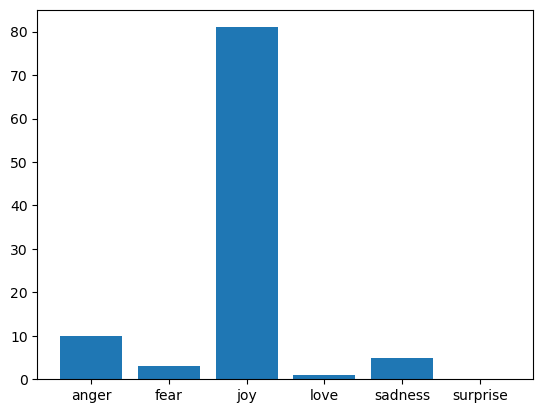

In [11]:
plt.bar(emotion_histograms.keys(), emotion_histograms.values())

### Append the Emotion Analysis Results to teh Dataset

In [12]:
emotion_labels = [s['label'] for s in tweets_emotion]
emotion_scores = [s['score'] for s in tweets_emotion]

RAW_DATA["emotion_label"] = emotion_labels
RAW_DATA["emotion_score"] = emotion_scores

RAW_DATA

,Unnamed: 0,id,text,created_at,is_sensitive,retweet_count,reply_count,like_count,quote_count,sentiment_label,sentiment_score,emotion_label,emotion_score
0,0,1593001348341338113,RT @appleinsider: How To Create and Share Cale...,2022-11-16 22:01:32+00:00,False,1,0,0,0,Neutral,0.750514,joy,0.884422
1,1,1593001333212483585,i’d like ask something. how do i snyc all musi...,2022-11-16 22:01:29+00:00,False,0,0,0,0,Neutral,0.521442,joy,0.817278
2,2,1593001286173347841,RT @GiveawayBase: Enter for a #chance to #win ...,2022-11-16 22:01:17+00:00,False,2,0,0,0,Positive,0.879341,joy,0.984591
3,3,1593001267131187203,How To Create and Share Calendars in iOS 16 ht...,2022-11-16 22:01:13+00:00,False,1,0,2,0,Neutral,0.693758,joy,0.851116
4,4,1593001231110152192,Abstract Flowers Pattern iPhone Case\nlink :ht...,2022-11-16 22:01:04+00:00,False,0,0,0,0,Neutral,0.827109,joy,0.613228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1592992946013732864,RT @OptionsProOI: #Apple $AAPL Unusual #Option...,2022-11-16 21:28:09+00:00,False,2,0,0,0,Neutral,0.914038,fear,0.883779
96,96,1592992705977946114,Ah yeah. More #iOS16 #bugs. #WellesBugs #Appl...,2022-11-16 21:27:12+00:00,False,0,0,0,0,Neutral,0.465231,anger,0.595546
97,97,1592992656740601857,"unforgettable” iMovie /apple Starring, filmin...",2022-11-16 21:27:00+00:00,False,0,0,0,0,Neutral,0.717987,sadness,0.637209
98,98,1592992434300284928,RT @jacobincambodia: Captured this lightning s...,2022-11-16 21:26:07+00:00,False,55,0,0,0,Neutral,0.789289,joy,0.815383


## Save as a New Dataset

In [13]:
RAW_DATA.to_csv("test_data_with_sentiment.csv")